In [2]:
!pip install pandas matplotlib numpy nltk seaborn scikit-learn gensim pyldavis wordcloud textblob spacy textstat

###  Dataset Overview

We begin by loading a dataset of radiology reports for exploratory data analysis.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
reports= pd.read_csv('data/open_ave_data.csv')

print(reports.shape)
reports.head(15)

(954, 6)


,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.
5,5,EXAM: CHEST RADIOGRAPHY EXAM DATE: 08/11/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 08/11/2021 ...,IMPRESSION: Normal single view chest.
6,6,Exam: XR CHEST AP OR PA ONLY INDICATION: Respi...,FINDINGS: Stable support devices. Stable heart...,INDICATION: Respiratory distress or failure re...,Exam: XR CHEST AP OR PA ONLY\n\nTECHNIQUE: AP ...,IMPRESSION: Slightly decreased lung volumes.
7,7,Exam: CR CHEST 2 VIEWS History: ACUTE BRONCHIT...,Findings: 2 views. Heart size appears normal. ...,History: ACUTE BRONCHITIS Views of the chest \n\n,Exam: CR CHEST 2 VIEWS\n\nComparison: None,Impression: Lungs clear. Electronically Signed...
8,8,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/27/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/27/2019 ...,IMPRESSION: Normal 2-view chest radiography.
9,9,EXAM: CHEST RADIOGRAPHY EXAM DATE: 10/22/2020 ...,FINDINGS: The mediastinal and cardiac silhouet...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 10/22/2020 ...,IMPRESSION: Clear lungs.


The dataset contains **954 entries and 6 columns**, including the full report text and its structured components: `findings`, `clinicaldata`, `exam name`, and `impression`. This layout provides both unstructured and semi-structured data, making it suitable for training models to segment and extract medical information from free-text reports.


### Character Count Distribution in ReportText

To begin our text statistics analysis, we examine the distribution of character counts across the `ReportText` column. This helps us understand the typical length of radiology reports and spot any significant outliers.

<Axes: >

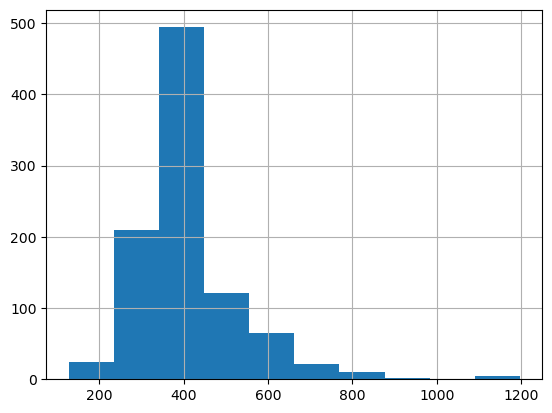

In [4]:
reports['ReportText'].str.len().hist()

The histogram above shows that most reports have a character length clustered between **300 and 500 characters**, with a sharp peak around 400. A few reports are significantly longer, extending beyond 1000 characters.

This insight is useful for setting preprocessing thresholds or sequence length limits if we plan to feed this data into NLP models.


### Word Count Distribution in ReportText

Next, we move on to data exploration at the word level. We plot the number of words appearing in each radiology report to better understand the textual density and verbosity of the documents.


<Axes: >

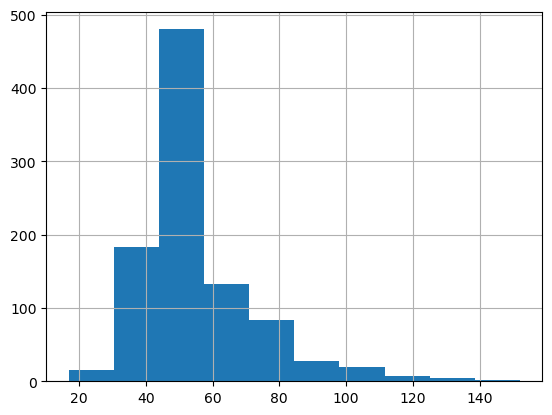

In [20]:
reports['ReportText'].str.split().map(lambda x: len(x)).hist()

The histogram shows that most reports contain between **40 and 80 words**, with a central tendency around 50. This suggests the reports are relatively concise, often summarizing findings in a brief yet standardized format.

This distribution insight helps in preparing tokenization strategies and setting appropriate maximum sequence lengths when training NLP models.


### Average Word Length in ReportText

We now analyze the average word length across each radiology report. This gives insight into the lexical complexity of the text and helps assess whether the vocabulary is more technical or simplified.


<Axes: >

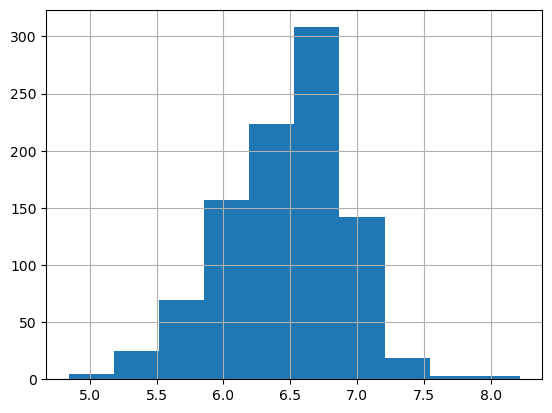

In [21]:
reports['ReportText'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

The histogram reveals that most reports contain words with an average length between **6 and 7 characters**, suggesting a predominance of moderately long medical terminology. The distribution is slightly left-skewed, which could be influenced by the frequent appearance of short functional words like articles and prepositions.


### Most Frequent Stopwords

To understand what may be contributing to shorter average word lengths, we examine the most common stopwords—words that are generally frequent but carry limited semantic weight (e.g., "is", "the", "and").



In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m19ya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stop = set(stopwords.words('english'))

<BarContainer object of 10 artists>

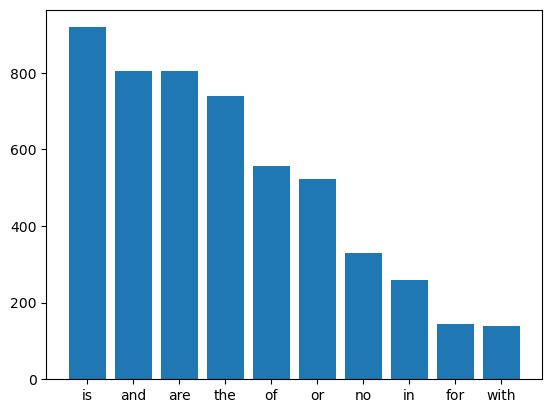

In [24]:
corpus=[]
report= reports['ReportText'].str.split()
report=report.values.tolist()
corpus=[word for i in report for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

Using a bar chart, we observe that the top stopwords in this dataset include **"is", "and", "are", "the", "of"**, etc. These words are often very short and may bias the average word length downward.

This step is important for identifying which tokens should be considered for removal or special treatment during preprocessing, especially if we're planning to train models on informative content rather than syntactic fillers.


### Most Frequent Non-Stopwords

After filtering out common stopwords, we now inspect the most frequently occurring informative words in the radiology reports. This step helps uncover domain-specific vocabulary and repeated patterns that characterize the dataset.


In [25]:
from collections import Counter
import seaborn as sns

<Axes: >

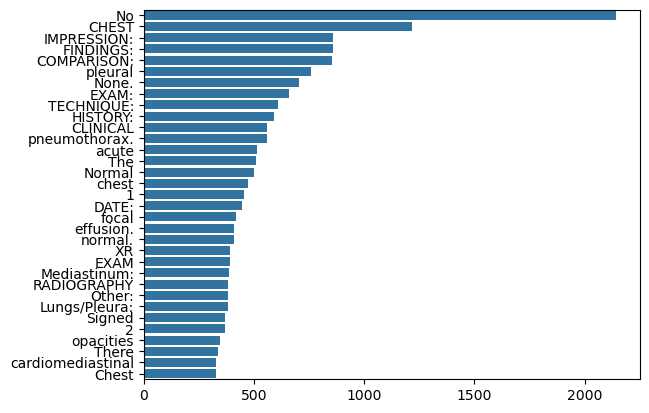

In [26]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

Using Python's `collections.Counter`, we find that terms like **"No"**, **"CHEST"**, **"IMPRESSION:"**, **"FINDINGS:"**, and **"pleural"** appear frequently. Many of these are radiological section headers or key anatomical/diagnostic terms.

This highlights the structured and repetitive nature of the report formatting, which is valuable when designing rule-based or supervised learning approaches for medical text segmentation or classification.


### Bigram Analysis: Most Common Word Pairs

To gain better insights into contextual patterns in the reports, we explore **bigrams**, which are pairs of consecutive words appearing together. This helps reveal common medical phrases or formatting structures that appear frequently in radiology narratives.



In [27]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

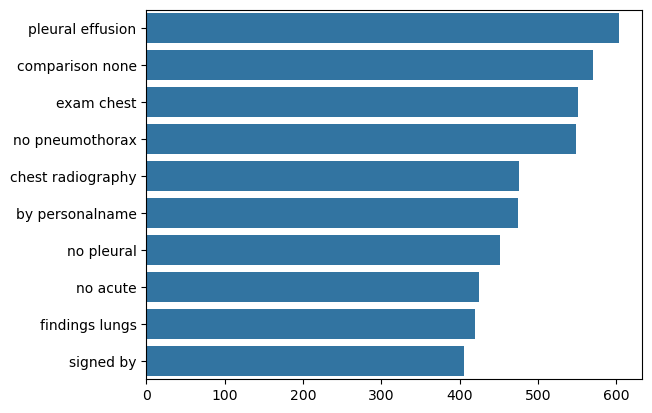

In [28]:
top_n_bigrams=get_top_ngram(reports['ReportText'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

The most frequent bigrams include phrases such as:
- **"pleural effusion"**
- **"comparison none"**
- **"exam chest"**
- **"no pneumothorax"**
- **"chest radiography"**

These word pairs highlight clinically relevant terminology and typical sentence structures used by radiologists. Such findings are helpful when designing tokenizers or phrase-based extraction techniques, and can improve downstream NLP tasks like classification, summarization, or information retrieval.

### Trigram Analysis: Most Common 3-Word Sequences

Following bigrams, we now examine **trigrams**, or sequences of three consecutive words. This offers deeper insight into structured phrasing and repeated patterns within the reports, especially in medical documentation where expressions tend to be formulaic.


<Axes: >

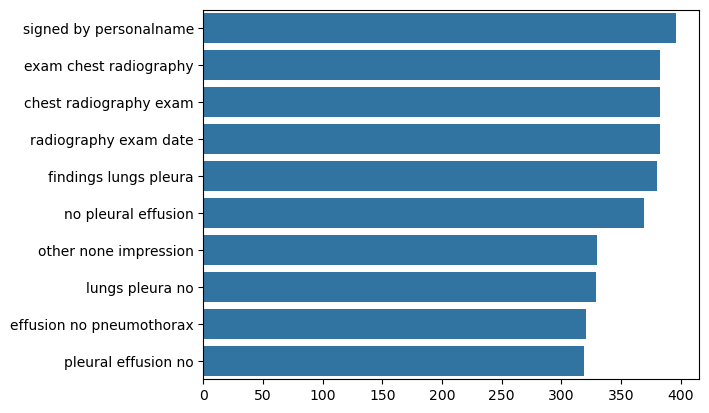

In [29]:
top_tri_grams=get_top_ngram(reports['ReportText'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

Among the most frequent trigrams, we observe:
- **"signed by personalname"**
- **"exam chest radiography"**
- **"radiography exam date"**
- **"findings lungs pleura"**
- **"no pleural effusion"**

These trigrams further confirm the presence of templated report structures and highlight medically significant terminology, which can be leveraged for building robust language models or rule-based parsing systems tailored for radiology data.


### Topic Modeling with Latent Dirichlet Allocation (LDA)

We apply **unsupervised topic modeling** using Latent Dirichlet Allocation (LDA) to uncover the main themes present in the radiology reports.

Before training the model, we perform the following preprocessing steps:
- **Tokenization**: splitting each report into individual tokens.
- **Stopword removal**: eliminating high-frequency but low-information words.
- **Lemmatization**: reducing words to their root forms.
- **Bag-of-words conversion**: representing each document as a frequency distribution of tokens.




In [30]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for reports in df['ReportText']:
        words=[w for w in word_tokenize(reports) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus=preprocess_news(reports)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m19ya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m19ya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:

import gensim


dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [32]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.037*"CHEST" + 0.019*"FINDINGS" + 0.018*"pneumothorax" + 0.018*"COMPARISON" + 0.018*"IMPRESSION" + 0.016*"PERSONALNAME" + 0.016*"effusion" + 0.015*"chest" + 0.015*"pleural" + 0.015*"VIEWS"'),
 (1,
  '0.052*"EXAM" + 0.039*"None" + 0.038*"CHEST" + 0.038*"view" + 0.028*"Normal" + 0.027*"Mediastinum" + 0.027*"RADIOGRAPHY" + 0.026*"Lungs/Pleura" + 0.026*"Other" + 0.026*"HISTORY"'),
 (2,
  '0.030*"The" + 0.026*"acute" + 0.022*"normal" + 0.022*"PERSONALNAME" + 0.021*"IMPRESSION" + 0.021*"FINDINGS" + 0.021*"COMPARISON" + 0.020*"chest" + 0.018*"CHEST" + 0.018*"There"'),
 (3,
  '0.027*"CHEST" + 0.025*"Normal" + 0.020*"chest" + 0.018*"Exam" + 0.017*"Findings" + 0.016*"Comparison" + 0.015*"Impression" + 0.015*"History" + 0.014*"pleural" + 0.013*"Electronically"')]

Using `gensim`’s `LdaMulticore`, we train an LDA model with 4 topics. Below are the top words associated with each discovered topic:

- **Topic 0**: CHEST, FINDINGS, pneumothorax, COMPARISON, IMPRESSION, pleural  
  → Likely reflects structured report sections and diagnostic keywords.
  
- **Topic 1**: EXAM, None, CHEST, view, Normal, RADIOGRAPHY  
  → Captures imaging technique and findings context.
  
- **Topic 2**: The, acute, normal, PERSONALNAME, chest  
  → Mixed content with signs of templated wording and generic descriptors.
  
- **Topic 3**: CHEST, Normal, Exam, Comparison, History  
  → Suggests repeated headers and typical exam summaries.

This step helps us explore latent patterns in the dataset and better understand how radiologists structure and phrase their reports, which can inform downstream classification or clustering tasks.

In [18]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.223703 -0.007555       1        1  34.158521
2     -0.069986 -0.118647       2        1  26.186733
3     -0.044415  0.110660       3        1  23.353620
0     -0.109302  0.015542       4        1  16.301126, topic_info=                Term        Freq       Total Category  logprob  loglift
127              The  478.000000  478.000000  Default  30.0000  30.0000
169         Dictated  244.000000  244.000000  Default  29.0000  29.0000
23           evident  306.000000  306.000000  Default  28.0000  28.0000
194        date/time  204.000000  204.000000  Default  27.0000  27.0000
18       RADIOGRAPHY  365.000000  365.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
28      pneumothorax   61.213813  676.012898   Topic4  -4.6587  -0.5879
217            limit   41.923484  175.740765   Topic4  -5.0372   0.3808
10           HISTORY   49.024145  569.400527   Topic4  -4.8808  -0.6383
15              None   48.930352  851.307960   Topic4  -4.8827  -1.0424
47   cardiopulmonary   42.641488  237.485571   Topic4  -5.0202   0.0967

[311 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1131      1  0.791579       01:13
1385      1  0.843601       01:40
744       1  0.791587  04/14/2021
1         1  0.791583       08:30
1508      1  0.791567       08:45
...     ...       ...         ...
220       4  0.212933      within
363       1  0.017017       x-ray
363       2  0.255250       x-ray
363       3  0.051050       x-ray
363       4  0.680667       x-ray

[527 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

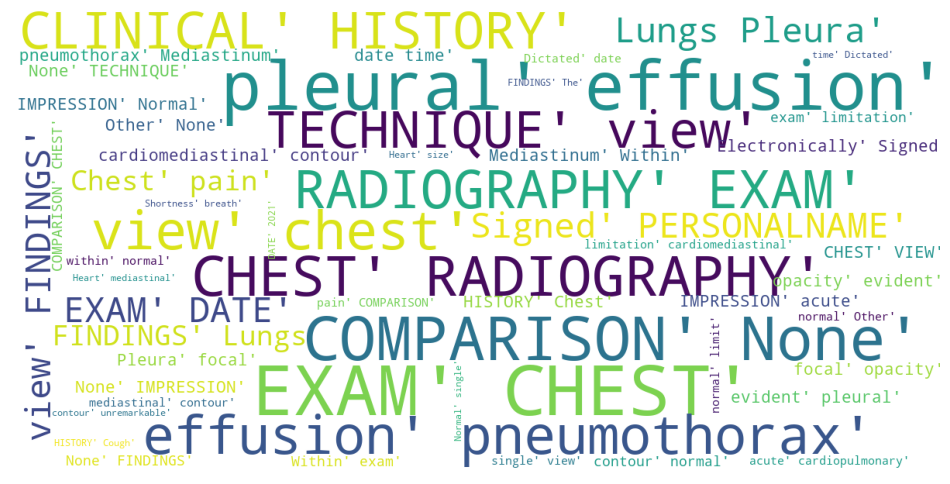

In [19]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)
